In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
from pathlib import Path
import pandas as pd

SAMPLE_RATE = 16000
N_MFCC = 40

# --- Load one processed file from Step 2 ---
PROCESSED_AUDIO_DIR = Path("data/processed/segments")
PROCESSED_FEATURES_CSV = Path("data/processed/processed_features.csv")

def visualize_audio(segment_path):
    """Visualize waveform + MFCCs + audio playback for a given .wav file."""
    print(f"🔍 Inspecting: {segment_path}")
    y, sr = librosa.load(segment_path, sr=SAMPLE_RATE)
    
    # --- Plot waveform ---
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

    # --- Plot MFCC heatmap ---
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar(label='dB')
    plt.title("MFCC Heatmap")
    plt.tight_layout()
    plt.show()

    # --- Play audio (Jupyter / Colab only) ---
    return ipd.Audio(y, rate=sr)

In [24]:
PROCESSED_FEATURES_CSV = Path("../data/processed/processed_features.csv")


🔍 Inspecting: ../data/processed/segments/03-01-07-01-02-02-02_seg1.wav


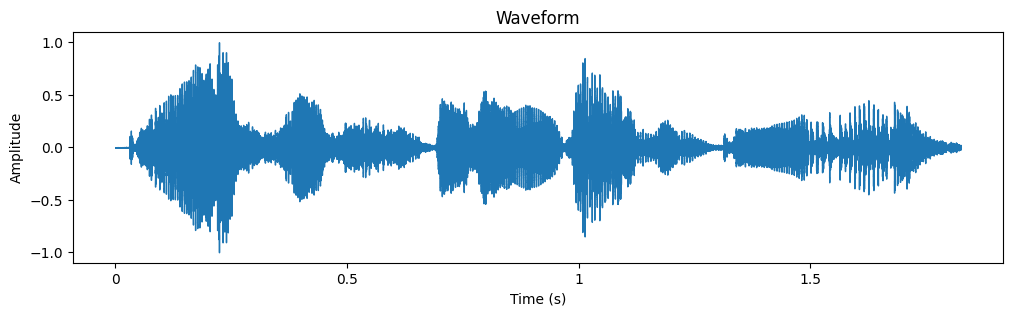

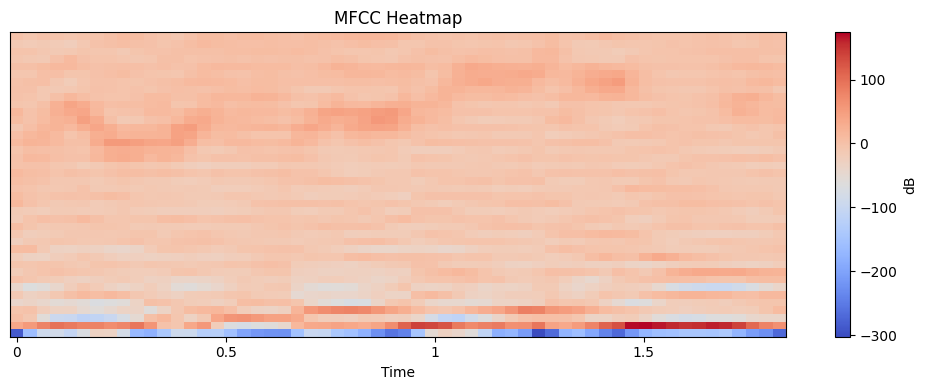

In [27]:
df_feat = pd.read_csv(PROCESSED_FEATURES_CSV)
sample_path = df_feat.iloc[107]["segment_path"]
audio_player = visualize_audio("../"+sample_path)
display(audio_player)
